In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install statsmodels --upgrade
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS203 Project/kep_lightcurves.csv')
for column in df.columns:
    print("{}: {}".format(column, df[column].isna().sum()))
df = df["001724719_rscl"]
df = df.dropna()
df.reset_index(drop=True, inplace=True)
dict1 = {"Rescaled_flux":np.asarray(df)}
df = pd.DataFrame(dict1)
#rescaled_flux_avgd = np.convolve(df["Rescaled_flux"], np.ones(10)/10, mode='valid')
#df = df.rolling(10).mean()
df = df.fillna(0)
df["Datetime"] = pd.date_range("2009-03-07", periods=len(df.index), freq="h")
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)
df = df.resample('M').mean()
df = df.fillna(0)
df.sort_index(inplace=True)

001430305_orig: 6632
001430305_rscl: 14691
001430305_diff: 20521
001430305_res: 20521
001724719_orig: 6632
001724719_rscl: 11807
001724719_diff: 15832
001724719_res: 15832
005209845_orig: 16458
005209845_rscl: 21610
005209845_diff: 25459
005209845_res: 25459
007596240_orig: 6635
007596240_rscl: 11337
007596240_diff: 14952
007596240_res: 14952
007609553_orig: 6634
007609553_rscl: 20598
007609553_diff: 25645
007609553_res: 25645
008241079_orig: 6633
008241079_rscl: 16883
008241079_diff: 20919
008241079_res: 20919
008247770_orig: 6634
008247770_rscl: 12545
008247770_diff: 16865
008247770_res: 16865
009345933_orig: 6630
009345933_rscl: 10464
009345933_diff: 13291
009345933_res: 13291
009347009_orig: 6634
009347009_rscl: 10848
009347009_diff: 14064
009347009_res: 14064
009349482_orig: 6634
009349482_rscl: 10406
009349482_diff: 13210
009349482_res: 13210
009349757_orig: 6634
009349757_rscl: 10638
009349757_diff: 13634
009349757_res: 13634
010024701_orig: 19695
010024701_rscl: 23829
010024701

In [4]:
df

,Rescaled_flux
Datetime,
2009-03-31,-0.685617
2009-04-30,1.892228
2009-05-31,1.288544
2009-06-30,-1.158369
2009-07-31,-2.299649
...,...
2015-08-31,1.691691
2015-09-30,0.215924
2015-10-31,-2.716292


In [13]:
def stationarity_test(df,series_name,index_name):
  result = adfuller(df[series_name])
  statistic = result[0]
  p_value = result[1]
  print("Dickey-fuller test : ", p_value)
  if p_value < 0.05:
    print("Time Series is Stationary")
  else:
    print("Time Series is not stationary")

def rolling(df,series_name,index_name,n):
  df2 = df.copy()
  roll_avg = df2[series_name].rolling(n).mean()
  #roll_avg.fill_na(0)
  plt.figure(figsize = (8,6))
  #plt.subplot(2,1,1)
  plt.plot(df2[series_name],label = series_name)
  plt.xlabel(index_name,size=12)
  plt.ylabel(series_name,size=12)
  roll_std = df[series_name].rolling(n).std()
  df2["mean-std"] = roll_avg-roll_std
  df2["mean+std"] = roll_avg+roll_std
  df2["roll_avg"] = roll_avg
  df2["std"] = roll_std
  plt.grid(True)
  #plt.show()
  #plt.subplot(2,1,2)
  #plt.figure(figsize=(16,6))
  plt.plot(df2["roll_avg"],label = "rolling mean")
  plt.plot(df2["std"],label = "rolling std")
  #plt.xlim("2007-07","2010-7")
  #plt.xlabel(index_name,size=12)
  #sns.lineplot(y="mean-std",x=index_name,data=df)
  plt.legend()
  plt.show()



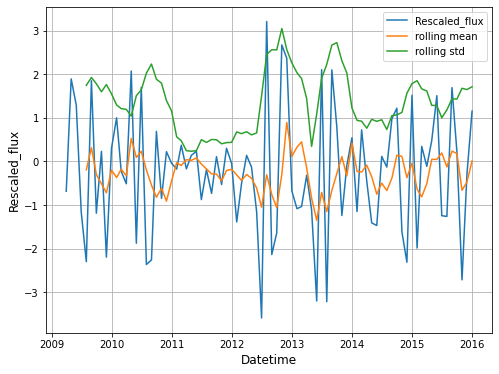

In [15]:
rolling(df,"Rescaled_flux","Datetime",5)

In [7]:
stationarity_test(df,"Rescaled_flux","Datetime")

Dickey-fuller test :  9.401517400053833e-09
Time Series is Stationary


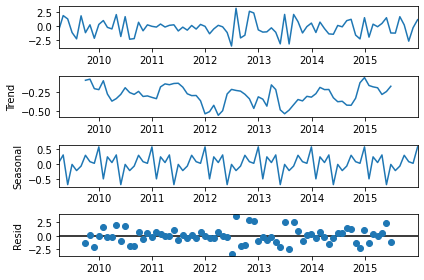

In [8]:
d=seasonal_decompose(df)
d.plot()
plt.show()

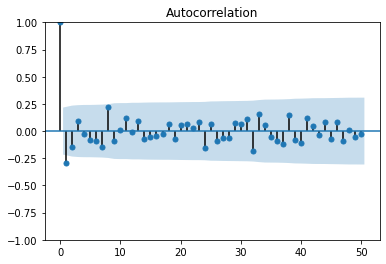

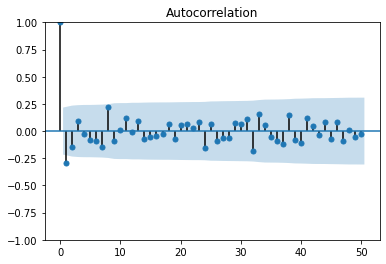

In [9]:
plot_acf(df["Rescaled_flux"], lags=50)

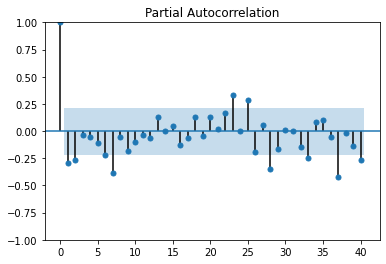

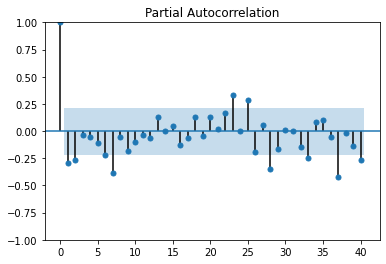

In [12]:
plot_pacf(df["Rescaled_flux"], lags=40)